In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

In [17]:
def display_average(data):
    data_average = np.mean(data)
    plt.plot(np.arange(0,len(data.columns),1), data_average)
    plt.ylabel("voltage (microV)")
    plt.xlabel("measuring number")

In [18]:
def start_avg(line, x):
    sum = 0
    for i in range(x):
        sum+=line[i]
    return sum/x

In [19]:
def modify_voltage(dataframe):
    for i in range(len(dataframe)):
        dataframe.iloc[i,:]-=start_avg(dataframe.iloc[i,:], 5)
    return dataframe

In [20]:
def open_all_files(file_name):
    with open("./Processed_data/Cheek/{}".format(file_name), 'rb') as file:
        cheek_array = np.load(file)
        cheek = modify_voltage(pd.DataFrame(cheek_array))
    
    with open("./Processed_data/Brow/{}".format(file_name), 'rb') as file:
        brow_array = np.load(file)
        brow = modify_voltage(pd.DataFrame(brow_array))
    
    with open("./Processed_data/Decisions/{}".format(file_name), 'rb') as file:
        meta = np.load(file)
        yes = meta[1]
        truth = meta[0]
    
    return cheek, brow, yes, truth

In [21]:
def display_single_person(file_name, cheek_bool, yes_bool):
    #cheek_bool: True if cheek; False if brow
    #yes_bool: True if said yes; False if said no
    cheek, brow, yes, truth = open_all_files(file_name)
    plt.figure(figsize=(15,10))
    
    data = None
    indices = None
    part = ""
    info = ""
    if cheek_bool:
        data = cheek
        part = "cheek"
    else:
        data = brow
        part = "brow"
    if yes_bool:
        indices = yes
        info = "yes"
    else:
        indices = (yes==False)
        info = "no"
    
    plt.subplot(2,1,1)
    display_average(data[indices & truth])
    plt.title(file_name+ "'s "+ part+" when telling truth and saying "+info)

    plt.subplot(2,1,2)
    display_average(data[indices & (truth==False)])
    plt.title(file_name+ "'s "+ part+" when lying and saying "+info)
    
    plt.savefig(file_name+"_"+part+"_"+info+".png")

In [22]:
def display_multiple(file_names, cheek_bool, yes_bool):
    for file_name in file_names:
        display_single_person(file_name, cheek_bool, yes_bool)

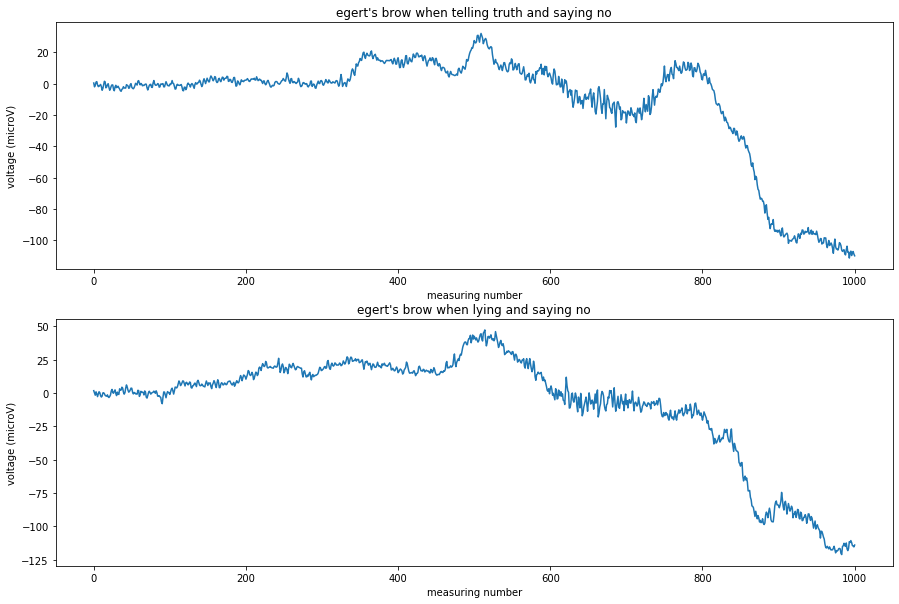

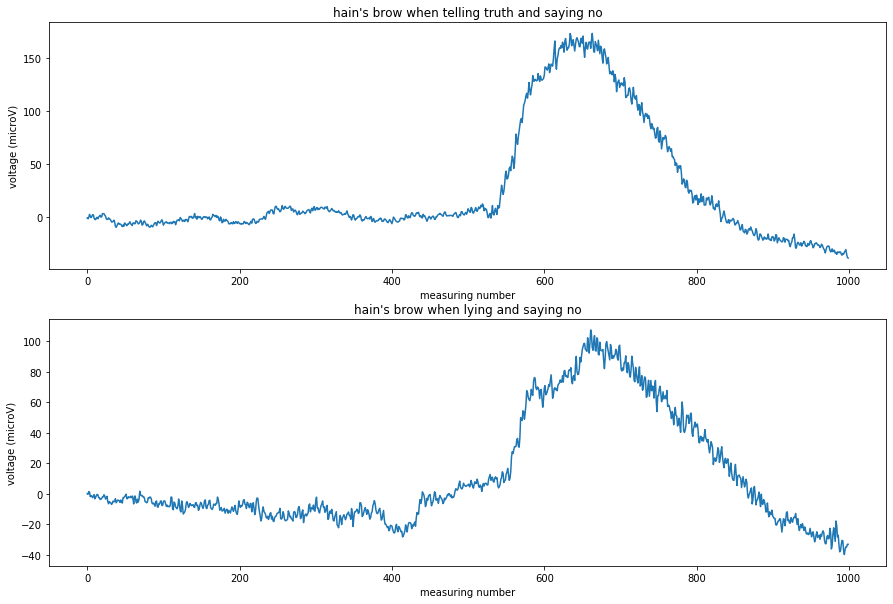

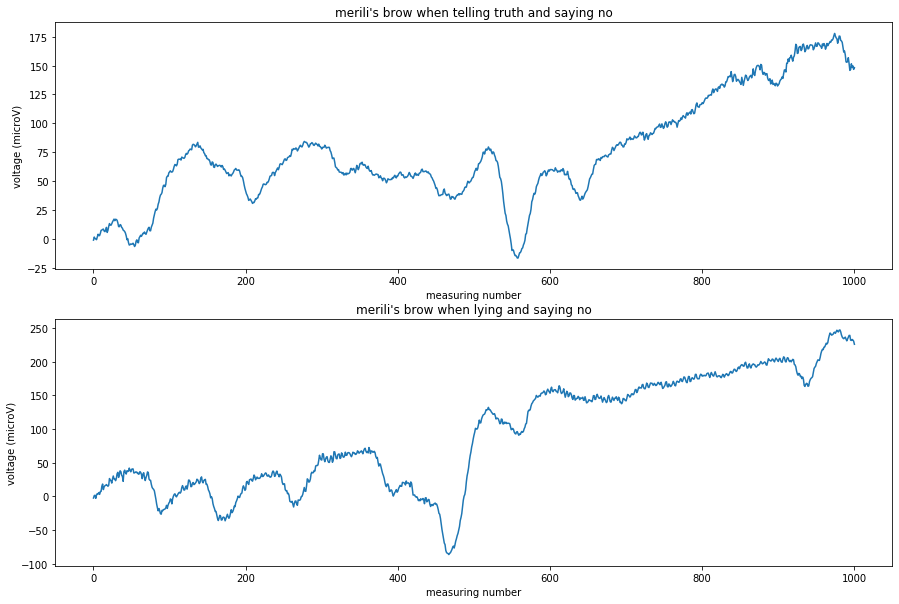

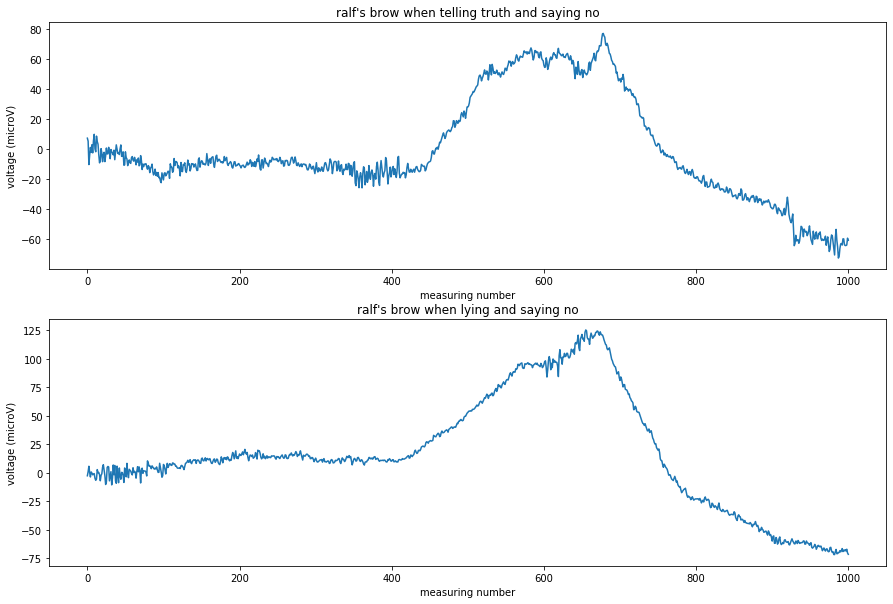

In [26]:
display_multiple(["egert","hain","merili","ralf"], False, False)

In [9]:
file_name = "ralf"

In [10]:
with open("./Processed_data/Cheek/{}".format(file_name), 'rb') as file:
    cheek_array = np.load(file)
    cheek = modify_voltage(pd.DataFrame(cheek_array))
    
with open("./Processed_data/Brow/{}".format(file_name), 'rb') as file:
    brow_array = np.load(file)
    brow = modify_voltage(pd.DataFrame(brow_array))
    
with open("./Processed_data/Decisions/{}".format(file_name), 'rb') as file:
    meta = np.load(file)
    yes = meta[1]
    truth = meta[0]

    

In [11]:
cheek_when_yes = cheek[yes]
cheek_when_yes_when_lying = cheek[yes & (truth == False)]
cheek_when_yes_when_truth = cheek[yes & truth]

cheek_when_no = cheek[yes==False]
cheek_when_no_when_lying = cheek[(yes==False) & (truth == False)]
cheek_when_no_when_truth = cheek[(yes==False) & truth]

brow_when_yes = brow[yes]
brow_when_yes_when_lying = brow[yes & (truth == False)]
brow_when_yes_when_truth = brow[yes & truth]

brow_when_no = brow[yes==False]
brow_when_no_when_lying = brow[(yes==False) & (truth == False)]
brow_when_no_when_truth = brow[(yes==False) & truth]

In [12]:
len(cheek_when_yes.columns)

1001

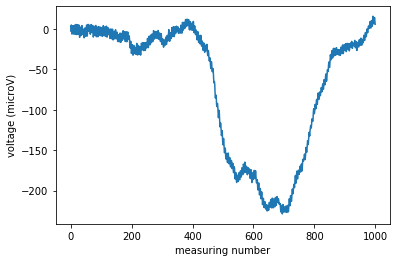

In [13]:
display_average(cheek_when_yes)

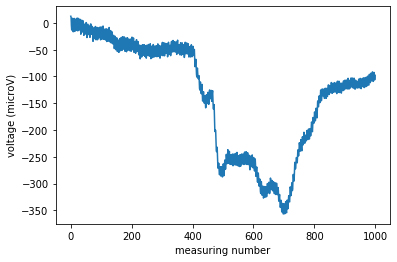

In [14]:
display_average(cheek_when_yes_when_lying)

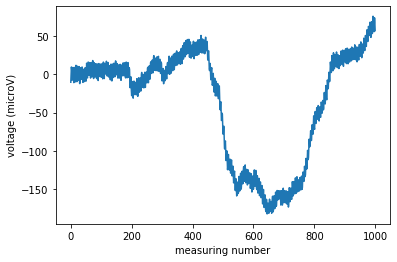

In [15]:
display_average(cheek_when_yes_when_truth)